## Sampling of Signals 
Generate the following signals with the specified sampling rate and listen to it.   Let $t$ vary from $0 - 3$seconds. Let the sampling rate is 8000Hz or a sampling time period is $125 \mu s$  (A sample is taken at every integer multiple of $125 \mu s$ )
 <ol>
  <li>$x(t) = sin(100\pi t)$ (100 Hz sinusoid)  </li>
 <li>$x(t) = cos(1000\pi t)$ (1kHz sinusoid)  </li>
  <li>$x(t) = sin(100 \pi t^2) $  (Called a chirp signal) </li>
</ol>
To listen to a signal, write the signal to a file using wave write command  from scipy
Please look up the documentation here (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.write.html).   Then download the signal and listen to it. 

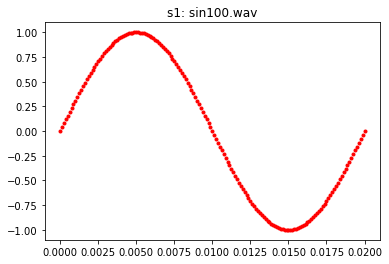

In [1]:
import numpy as np 
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Set the sampling rate
rate = 8000;

# Genearate the t values use np.arange
t = np.arange(0,3,(1.0/8000))

#Generate signal 
s1 = np.sin(100*np.pi*t)

#Write thee signal 
wav.write('sin100.wav',rate, s1);
plt.plot(t[0:161],s1[0:161],'r.')
plt.title('s1: sin100.wav')
plt.show()

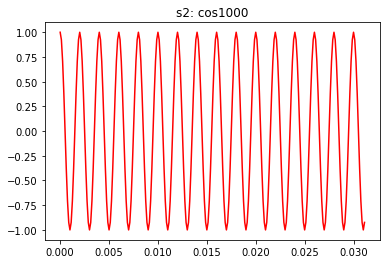

In [3]:
s2 = np.cos(1000*np.pi*t)

wav.write('cos1000.wav',rate, s2);
plt.plot(t[0:250],s2[0:250],'r')
plt.title('s2: cos1000')
plt.show()

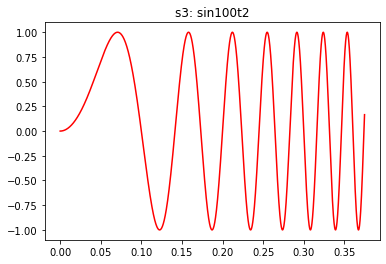

In [4]:
s3 = np.sin(100*np.pi*t**2)

wav.write('sin100t2.wav',rate, s3);
plt.plot(t[0:3000],s3[0:3000],'r')
plt.title('s3: sin100t2')
plt.show()

---

Sample the signal $cos ( 10 \pi t)$ using the following frequencies (a) 20 Hz (b) 7.5 Hz (c) 5 Hz (d) 2.5 Hz.   In each case, plot the signal and determine its period. 

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

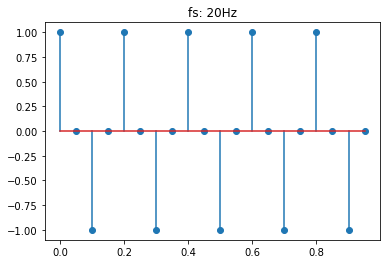

In [12]:
fs = 20 # 20 Hz sampling frequency
t=np.arange(0,1,(1.0/fs))

x1 = np.cos(10*np.pi*t)

plt.stem(t, x1)
#plt.plot(t, x1, 'r')
plt.title("fs: 20Hz")
plt.show()

**Period of this signal is 4**

---

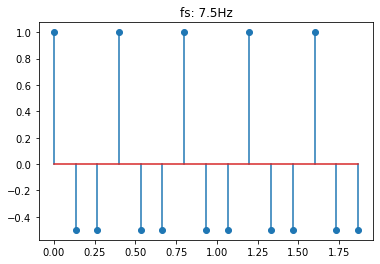

In [16]:
import numpy as np
fs = 7.5 # 7.5 Hz sampling frequency
t=np.arange(0,2,(1.0/fs))

x2 = np.cos(10*np.pi*t)

plt.stem(t, x2)
#plt.plot(t, x2, 'r')
plt.title("fs: 7.5Hz")
plt.show()

**Period of this signal is 3**

---

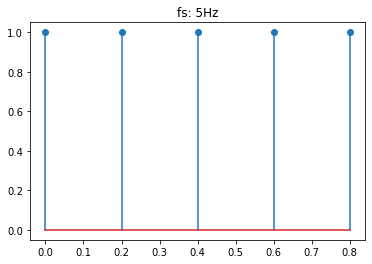

In [17]:
fs = 5 # 5 Hz sampling frequency
t=np.arange(0,1,(1.0/fs))

x3 = np.cos(10*np.pi*t)

plt.stem(t, x3)
plt.title("fs: 5Hz")
plt.show()

**Period of this signal is 1**

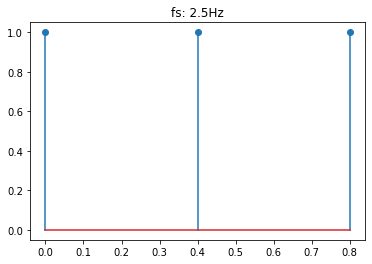

In [18]:
fs = 2.5 # 5 Hz sampling frequency
t=np.arange(0,1,(1.0/fs))

x4 = np.cos(10*np.pi*t)

plt.stem(t, x4)
plt.title("fs: 2.5Hz")
plt.show()

**Period of this signal is 1**

---

In DTMF dialling a number is represented by a dual frequency tone. Do a
web search and find the frequencies of each digit. Generate DTMF tones
corresponding to the telephone number 08242474040 by sampling the sum
of sinusoids at the required frequencies at Fs = 8192 Hz. Concatenate the
signals by putting 100 zeros between each signal (to represent silence) and
listen to the signal. (Must sound like tone dialling the number from
a phone)

In [19]:
import numpy as np 
import scipy.io.wavfile as wav
rate=8192
t=np.arange(0,0.5,1/8192)

fq = {'8':(852, 1336), '0':(941, 1336), '2':(697, 1336), '4':(770, 1209), '7':(852, 1209)}

In [41]:
digit8 = np.sin(fq['8'][0]*np.pi*t) + np.sin(fq['8'][1]*np.pi*t)
digit0 = np.sin(fq['0'][0]*np.pi*t) + np.sin(fq['0'][1]*np.pi*t)
digit2 = np.sin(fq['2'][0]*np.pi*t) + np.sin(fq['2'][1]*np.pi*t)
digit4 = np.sin(fq['4'][0]*np.pi*t) + np.sin(fq['4'][1]*np.pi*t)
digit7 = np.sin(fq['7'][0]*np.pi*t) + np.sin(fq['7'][1]*np.pi*t)

add0 = np.zeros((100,))

dtmf = np.concatenate((
    digit0, add0, digit8, add0, digit2, add0, digit4, add0, digit2, add0, digit4, add0, 
   digit7, add0, digit4, add0, digit0, add0, digit4, add0, digit0, add0 
))

wav.write('dtmf.wav',rate, dtmf);

https://www.engineersgarage.com/tutorials/dtmf-dual-tone-multiple-frequency/

Record your own voice for half a minute and observe the time domain
waveform (It can be done using a sound recording program in the com-
puter. Please save in *.wav format, upload it  and read it using wavread command
in Python for further processing).  Please look https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html for documentation <br>


(a) Find the sampling rate used by the recorder<br>
(b) Convert it to 8kHz sampling rate and listen to it (Just drop the in
between samples. eg: if the input is recorded at
16kHz drop every second sample) <br>
(c) Find the mean (average value) and  variance of the entire signal.   Use np.mean and np.var commands 

16000


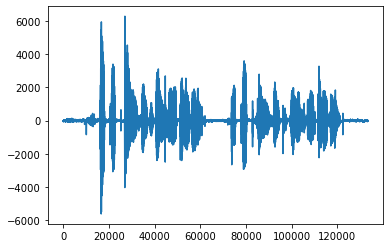

66640
0.18043217286914767
0.1782398383522759
300585.5018905095
294771.88163511857
6302
548.2567846278872


In [6]:
import numpy as np 
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import scipy.signal as sig

## Assuming that the file was saved in aud2.wav
rate1,data = wav.read('brown_fox.wav')   # mmap = False)

print(rate1)
plt.plot(data[:, 0])
plt.show()

data2 = sig.decimate(data.T,2).T
print(len(data2))

print(np.mean(data))
print(np.mean(data2))

print(np.var(data))
print(np.var(data2))

print(np.max(data))
print(np.std(data))

In [7]:
data2.shape

(66640, 2)

In [8]:
wav.write('brown_fox_8000.wav', 8000, data2);